<a href="https://colab.research.google.com/github/muq7sal/Diet-Calories-Tracker-App/blob/main/Cardiovascular_Disease_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install fuzzy-c-means

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from fcmeans import FCM  # works with fuzzy-c-means
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [ ]:
data_set= pd.read_csv(r"/content/drive/MyDrive/Cardiovascular_Disease_Dataset.csv")

In [ ]:
data_set.keys()

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
data_set.shape

(70000, 13)

In [ ]:
data_set.size

910000

In [ ]:
data_set.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


gender
1    45530
2    24470
Name: count, dtype: int64


/tmp/ipython-input-3818642082.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=gender,palette=['#354cc4',"#AD3A62"])


<Axes: title={'center': 'Gender'}, xlabel='gender', ylabel='count'>

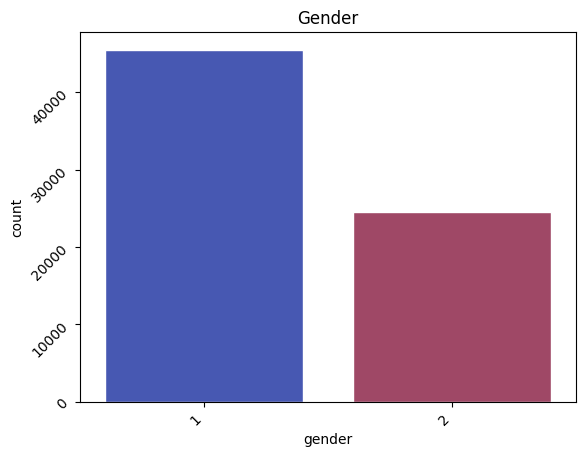

In [ ]:
# Gender Class Distribution
gender = data_set['gender']
print(gender.value_counts())
plt.title('Gender')
diverging_colors = sns.color_palette("RdBu", 10)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
sns.set_theme(style="whitegrid")
sns.countplot(x=gender,palette=['#354cc4',"#AD3A62"])

cardio
0    35021
1    34979
Name: count, dtype: int64


/tmp/ipython-input-1765630636.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=disease, palette=['#B7CD85','#761674'])


<Axes: title={'center': 'Cardiovascular Disease'}, xlabel='cardio', ylabel='count'>

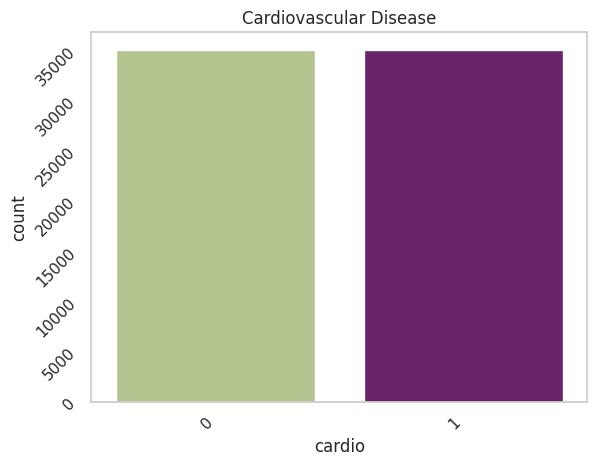

In [ ]:
disease = data_set['cardio']
print(disease.value_counts())
plt.title('Cardiovascular Disease')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
plt.grid()
sns.set_theme(style="whitegrid")
sns.countplot(x=disease, palette=['#B7CD85','#761674'])

In [ ]:
print(np.array(data_set['cardio']))

[0 1 1 ... 1 1 0]


In [ ]:
data_set.isnull().values.any()

False

In [ ]:
%%time
# Seed for random state
SEED = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_set.drop(['id','cardio'], axis=1), data_set["cardio"], test_size=0.25, random_state=SEED)


CPU times: user 8.98 ms, sys: 3.93 ms, total: 12.9 ms
Wall time: 12.8 ms


In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
import joblib

rfc = RandomForestClassifier();

rfc.fit(X_train, y_train)
joblib.dump(rfc,'Random_forest_classifier')

feat_imp = pd.DataFrame({'feature':X_train.columns,'importance':rfc.feature_importances_})
feat_imp = feat_imp.sort_values('importance',ascending=False).set_index('feature')

CPU times: user 11.2 s, sys: 307 ms, total: 11.5 s
Wall time: 18.2 s


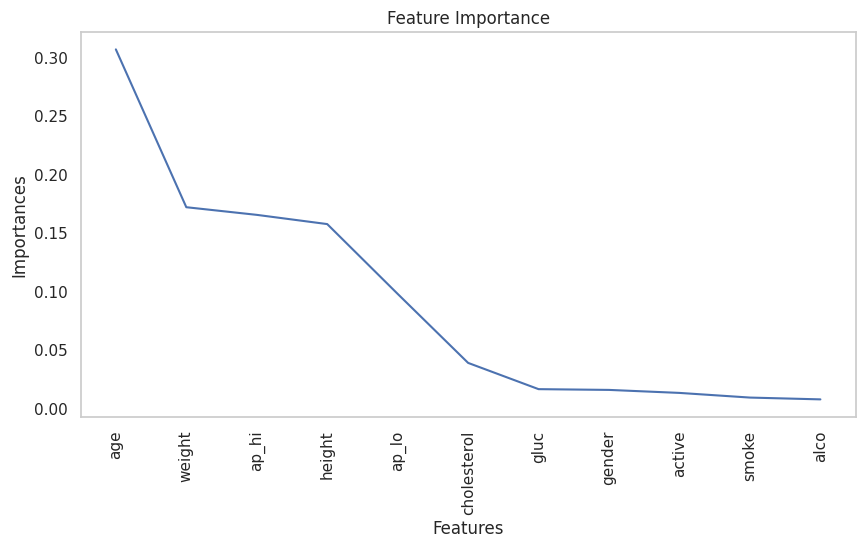

In [ ]:
# plot feat_imp
plt.figure(figsize = (10, 5))
plt.title("Feature Importance")
plt.ylabel("Importances")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.plot(feat_imp)
plt.grid()

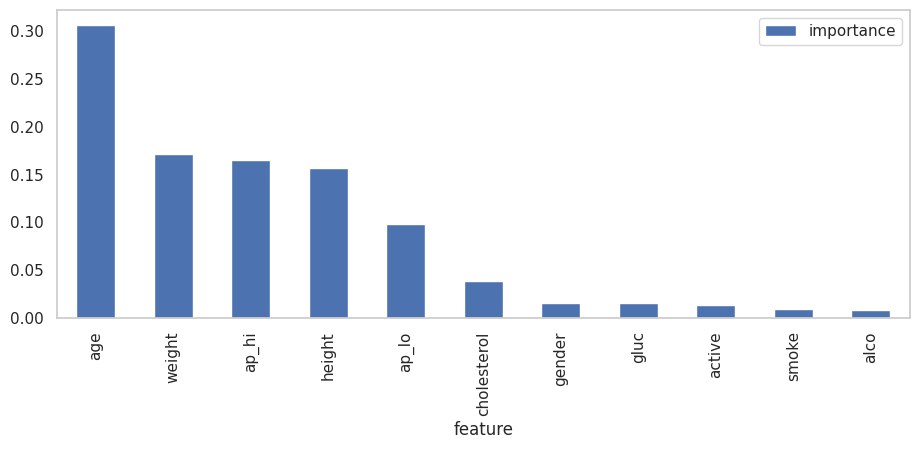

In [ ]:
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();
plt.grid()

In [ ]:
print(feat_imp)

             importance
feature                
age            0.306576
weight         0.171791
ap_hi          0.165265
height         0.157384
ap_lo          0.097772
cholesterol    0.038845
gluc           0.016429
gender         0.015782
active         0.013218
smoke          0.009238
alco           0.007699


In [ ]:
#reduce columns
data_set.drop(['id','age'], axis='columns',inplace=True)
data_set.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,156,85.0,140,90,3,1,0,0,1,1
2,1,165,64.0,130,70,3,1,0,0,0,1
3,2,169,82.0,150,100,1,1,0,0,1,1
4,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data_set.shape

(70000, 11)

In [ ]:
scaled_data = normalize(data_set)
print(scaled_data)

[[0.00889328 0.74703566 0.27569173 ... 0.         0.00444664 0.        ]
 [0.00410741 0.6407557  0.34912971 ... 0.         0.00410741 0.00410741]
 [0.00433828 0.71581662 0.27765008 ... 0.         0.         0.00433828]
 ...
 [0.00685873 0.62757408 0.36008349 ... 0.00342937 0.         0.00342937]
 [0.00421132 0.6864451  0.30321502 ... 0.         0.         0.00421132]
 [0.00426825 0.7256018  0.3073137  ... 0.         0.00426825 0.        ]]


In [ ]:
scaler=MinMaxScaler()
scaler.fit(scaled_data)

MinMaxScaler()

In [ ]:
scaled_data=scaler.transform(scaled_data)
print(scaled_data.shape)

(70000, 11)


In [ ]:
print ('11-Dimension')
print(scaled_data)

11-Dimension
[[0.69530008 0.80823112 0.37987449 ... 0.         0.59950548 0.        ]
 [0.31848328 0.69159803 0.48269386 ... 0.         0.55376944 0.50091861]
 [0.33666121 0.77397091 0.38261634 ... 0.         0.         0.52907485]
 ...
 [0.53510945 0.67713234 0.49803008 ... 0.55929173 0.         0.41822809]
 [0.32666476 0.74173821 0.41840941 ... 0.         0.         0.51359111]
 [0.33114686 0.7847093  0.42414792 ... 0.         0.57545389 0.        ]]


/tmp/ipython-input-1693427542.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


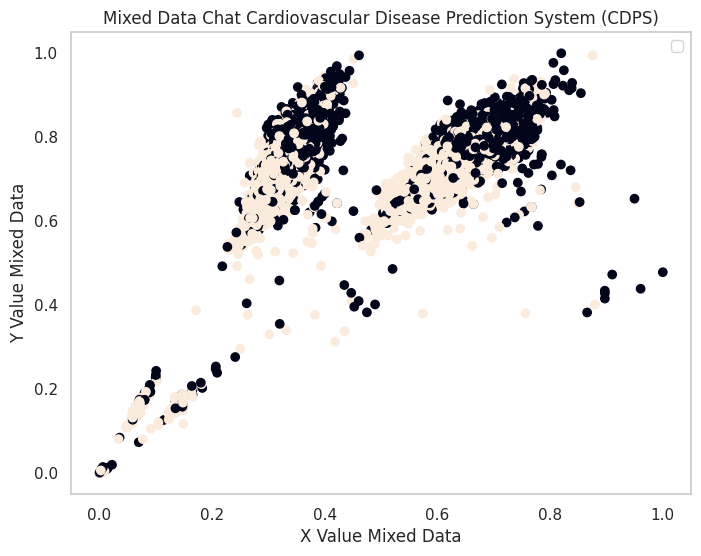

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=data_set["cardio"])
plt.title('Mixed Data Chat Cardiovascular Disease Prediction System (CDPS)')
plt.xlabel('X Value Mixed Data')
plt.ylabel('Y Value Mixed Data')
plt.grid()
plt.legend()

In [ ]:
x=np.asarray(scaled_data)
y=np.asarray(data_set["cardio"])

In [ ]:
x

array([[0.69530008, 0.80823112, 0.37987449, ..., 0.        , 0.59950548,
        0.        ],
       [0.31848328, 0.69159803, 0.48269386, ..., 0.        , 0.55376944,
        0.50091861],
       [0.33666121, 0.77397091, 0.38261634, ..., 0.        , 0.        ,
        0.52907485],
       ...,
       [0.53510945, 0.67713234, 0.49803008, ..., 0.55929173, 0.        ,
        0.41822809],
       [0.32666476, 0.74173821, 0.41840941, ..., 0.        , 0.        ,
        0.51359111],
       [0.33114686, 0.7847093 , 0.42414792, ..., 0.        , 0.57545389,
        0.        ]])

In [ ]:
y

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
data_scaled=pd.DataFrame(x)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.695300,0.808231,0.379874,0.682578,0.525254,0.253098,0.267706,0.0,0.0,0.599505,0.000000
1,0.318483,0.691598,0.482694,0.735963,0.535527,0.707749,0.246992,0.0,0.0,0.553769,0.500919
2,0.336661,0.773971,0.382616,0.729090,0.486882,0.747734,0.261090,0.0,0.0,0.000000,0.529075
3,0.599878,0.700727,0.434819,0.736625,0.546143,0.218116,0.230705,0.0,0.0,0.517808,0.468389
4,0.383576,0.833131,0.380742,0.685240,0.481256,0.281241,0.297474,0.0,0.0,0.000000,0.000000


**Fuzzy C-Means Clustering**

In [ ]:
fcm = FCM(n_clusters=2)
fcm.fit(x)

In [ ]:
fcm_centers = fcm.centers
fcm_predict = fcm.predict(x)

In [ ]:
fcm_centers

array([[0.42890059, 0.73522936, 0.43101494, 0.71604845, 0.52514834,
        0.33932962, 0.30884622, 0.05050712, 0.03107197, 0.44517264,
        0.43433597],
       [0.43664108, 0.76344378, 0.42472595, 0.70096331, 0.51946155,
        0.29943508, 0.29948283, 0.04566378, 0.02743682, 0.50420089,
        0.0675426 ]])

In [ ]:
fcm_predict

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
data_scaled=pd.DataFrame(x)
data_scaled['Cluster']=fcm_predict
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,Cluster
0,0.695300,0.808231,0.379874,0.682578,0.525254,0.253098,0.267706,0.0,0.0,0.599505,0.000000,1
1,0.318483,0.691598,0.482694,0.735963,0.535527,0.707749,0.246992,0.0,0.0,0.553769,0.500919,0
2,0.336661,0.773971,0.382616,0.729090,0.486882,0.747734,0.261090,0.0,0.0,0.000000,0.529075,0
3,0.599878,0.700727,0.434819,0.736625,0.546143,0.218116,0.230705,0.0,0.0,0.517808,0.468389,0
4,0.383576,0.833131,0.380742,0.685240,0.481256,0.281241,0.297474,0.0,0.0,0.000000,0.000000,1


In [ ]:
data_scaled=data_scaled.drop([10], axis=1)

In [ ]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,Cluster
0,0.695300,0.808231,0.379874,0.682578,0.525254,0.253098,0.267706,0.0,0.0,0.599505,1
1,0.318483,0.691598,0.482694,0.735963,0.535527,0.707749,0.246992,0.0,0.0,0.553769,0
2,0.336661,0.773971,0.382616,0.729090,0.486882,0.747734,0.261090,0.0,0.0,0.000000,0
3,0.599878,0.700727,0.434819,0.736625,0.546143,0.218116,0.230705,0.0,0.0,0.517808,0
4,0.383576,0.833131,0.380742,0.685240,0.481256,0.281241,0.297474,0.0,0.0,0.000000,1


In [ ]:
data_set1=data_scaled[data_scaled.Cluster==0]
data_set2=data_scaled[data_scaled.Cluster==1]

print('Non-Cardiovascular',data_set1)
print('Cardiovascular',data_set2)

print(data_set1.shape)
print(data_set2.shape)

Non-Cardiovascular               0         1         2         3         4         5         6  \
1      0.318483  0.691598  0.482694  0.735963  0.535527  0.707749  0.246992   
2      0.336661  0.773971  0.382616  0.729090  0.486882  0.747734  0.261090   
3      0.599878  0.700727  0.434819  0.736625  0.546143  0.218116  0.230705   
7      0.609282  0.750325  0.512666  0.693715  0.521792  0.671897  0.710678   
15     0.622787  0.740831  0.618949  0.675872  0.498096  0.226514  0.239588   
...         ...       ...       ...       ...       ...       ...       ...   
69993  0.317898  0.762316  0.395705  0.709839  0.535034  0.233085  0.246539   
69994  0.309951  0.712543  0.441802  0.751387  0.498856  0.227258  0.240375   
69996  0.295805  0.650672  0.667662  0.710905  0.516417  0.437377  0.462622   
69997  0.535109  0.677132  0.498030  0.762218  0.490541  0.590321  0.205590   
69998  0.326665  0.741738  0.418409  0.731918  0.511376  0.239513  0.510486   

         7         8         9  

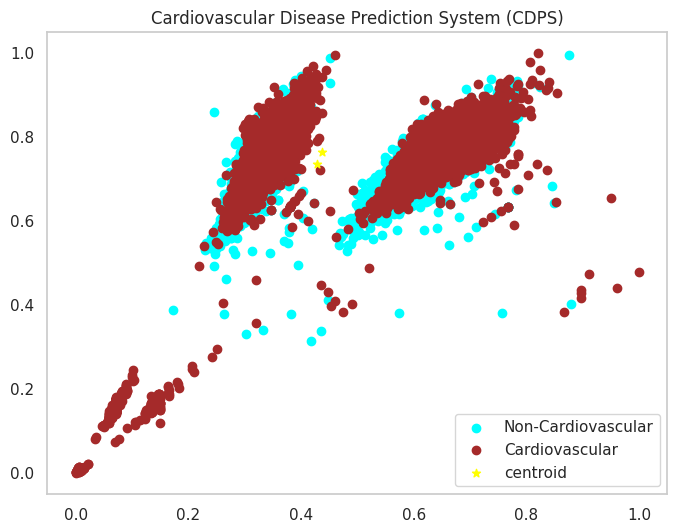

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data_set1[0],data_set1[1], color='cyan', label='Non-Cardiovascular')
plt.scatter(data_set2[0],data_set2[1], color='brown', label='Cardiovascular')
plt.scatter(fcm_centers[:,0],fcm_centers[:,1], color='yellow', marker='*',label='centroid')
plt.title('Cardiovascular Disease Prediction System (CDPS)')
plt.grid()
plt.legend()

In [ ]:
data_scaled = data_scaled.rename(columns = {0: 'gender', 1:'height',2:'weight', 3:'ap_hi',4:'ap_lo',5:'cholesterol',6:'gluc',7:'smoke', 8:'alco',9:'active', 10:'cardio','Cluster':'Cluster'}, inplace = False)
data_scaled

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,Cluster
0,0.695300,0.808231,0.379874,0.682578,0.525254,0.253098,0.267706,0.000000,0.000000,0.599505,1
1,0.318483,0.691598,0.482694,0.735963,0.535527,0.707749,0.246992,0.000000,0.000000,0.553769,0
2,0.336661,0.773971,0.382616,0.729090,0.486882,0.747734,0.261090,0.000000,0.000000,0.000000,0
3,0.599878,0.700727,0.434819,0.736625,0.546143,0.218116,0.230705,0.000000,0.000000,0.517808,0
4,0.383576,0.833131,0.380742,0.685240,0.481256,0.281241,0.297474,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
69995,0.667717,0.775937,0.448395,0.697149,0.514923,0.242986,0.257011,0.696631,0.000000,0.575889,1
69996,0.295805,0.650672,0.667662,0.710905,0.516417,0.437377,0.462622,0.000000,0.000000,0.514937,0
69997,0.535109,0.677132,0.498030,0.762218,0.490541,0.590321,0.205590,0.000000,0.559292,0.000000,0
69998,0.326665,0.741738,0.418409,0.731918,0.511376,0.239513,0.510486,0.000000,0.000000,0.000000,0


In [ ]:
frequency=pd.crosstab(index=data_scaled['Cluster'], columns='Frequency')
df_frequency=frequency/frequency.sum()
target_attribute = ['Non-Cardiovascular','Cardiovascular']
df_frequency['Target Attribute'] = target_attribute
df_frequency

col_0,Frequency,Target Attribute
Cluster,,
0,0.487871,Non-Cardiovascular
1,0.512129,Cardiovascular


In [ ]:
sse=[]
f_rng=range(1,4)
for f in f_rng:
    fm = FCM(n_clusters=f)
    fm.fit(x)
    sse.append(fm.partition_coefficient)
    sse

In [ ]:
sse

[1.0, 0.3138642509408865, 0.18041106918088484]

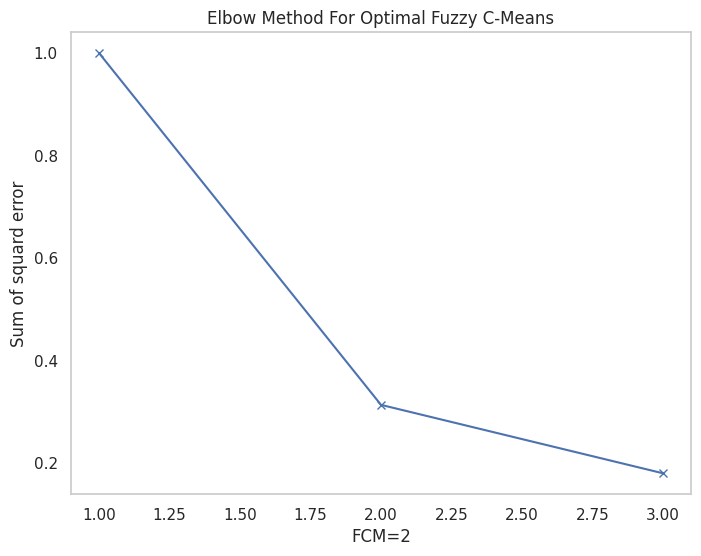

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Elbow Method For Optimal Fuzzy C-Means')
plt.xlabel('FCM=2')
plt.ylabel('Sum of squard error')
plt.grid()
plt.plot(f_rng,sse,'bx-')

In [ ]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,70000.0,0.439945,0.157274,0.0,0.329512,0.348162,0.627208,1.0
height,70000.0,0.747602,0.084950,0.0,0.725331,0.763459,0.785969,1.0
weight,70000.0,0.428026,0.079185,0.0,0.384246,0.422694,0.471359,1.0
ap_hi,70000.0,0.707535,0.043062,0.0,0.693786,0.706908,0.727286,1.0
ap_lo,70000.0,0.523350,0.058450,0.0,0.505995,0.518414,0.529621,1.0
cholesterol,70000.0,0.326718,0.163912,0.0,0.237925,0.249561,0.291228,1.0
gluc,70000.0,0.310840,0.148659,0.0,0.248348,0.260775,0.275144,1.0
smoke,70000.0,0.059051,0.191486,0.0,0.000000,0.000000,0.000000,1.0
alco,70000.0,0.036034,0.152405,0.0,0.000000,0.000000,0.000000,1.0
active,70000.0,0.456726,0.233340,0.0,0.512976,0.564245,0.591524,1.0


**Training & Testing Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,fcm_predict,train_size=0.75,test_size=0.25,random_state=42)

In [ ]:
print('Number of data points in train data:', X_train.shape)
print('Number of data points in test data:',X_test.shape)

Number of data points in train data: (52500, 11)
Number of data points in test data: (17500, 11)


In [ ]:
X_train.shape

(52500, 11)

In [ ]:
X_test.shape

(17500, 11)

In [ ]:
y_train.shape

(52500,)

In [ ]:
y_test.shape

(17500,)

**Quadratic Discriminant Analysis Classifier**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
quadratic_discriminant_analysis= QuadraticDiscriminantAnalysis()
print(quadratic_discriminant_analysis)

QuadraticDiscriminantAnalysis()


In [ ]:
quadratic_discriminant_analysis_model_history=quadratic_discriminant_analysis.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [ ]:
accu=quadratic_discriminant_analysis.score(X_test,y_test)
print("Accuracy:",(accu*100.0),'%')

Accuracy: 99.98857142857143 %


In [ ]:
y_pred=quadratic_discriminant_analysis.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

[[8593    2]
 [   0 8905]]




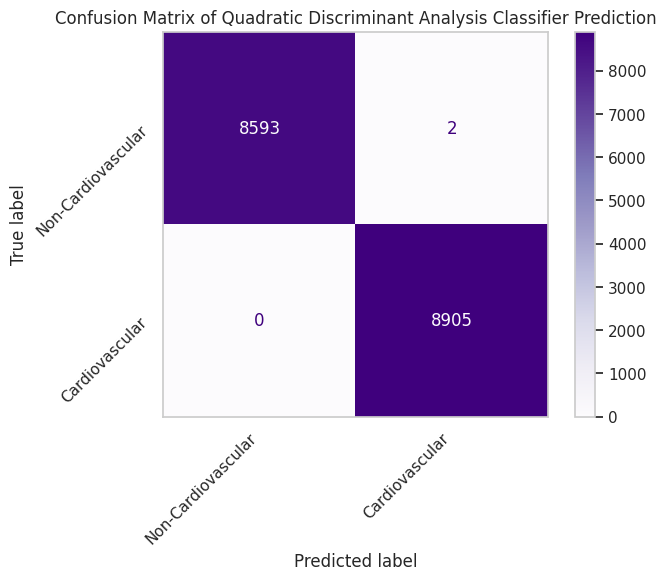

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_predict=quadratic_discriminant_analysis.predict(X_test)

target_names = ['Non-Cardiovascular', 'Cardiovascular']

print(confusion_matrix(y_test,y_predict))
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(7, 5))
cmp = ConfusionMatrixDisplay(cm, display_labels=target_names)
cmp.plot(ax=ax,cmap=plt.cm.Purples)

print('\n')
plt.title('Confusion Matrix of Quadratic Discriminant Analysis Classifier Prediction')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
plt.grid()
plt.show()

In [ ]:
y_pred=quadratic_discriminant_analysis.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
target_attribute = ['Non-Cardiovascular', 'Cardiovascular']
classificationreport=classification_report(y_test,y_predict,target_names=target_attribute)
arr = np.array(classificationreport)
print(confusion_matrix(y_test,y_predict))
print(arr)

[[8593    2]
 [   0 8905]]
                    precision    recall  f1-score   support

Non-Cardiovascular       1.00      1.00      1.00      8595
    Cardiovascular       1.00      1.00      1.00      8905

          accuracy                           1.00     17500
         macro avg       1.00      1.00      1.00     17500
      weighted avg       1.00      1.00      1.00     17500



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predict, average='macro')

(0.9998877287526664, 0.9998836532867946, 0.99988567794754, None)

In [ ]:
cm1 = confusion_matrix(y_test,y_predict)
total1=sum(sum(cm1))
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity Score: ', sensitivity1)
print('Specificity Score: ', specificity1)

Sensitivity Score:  0.9997673065735893
Specificity Score:  1.0


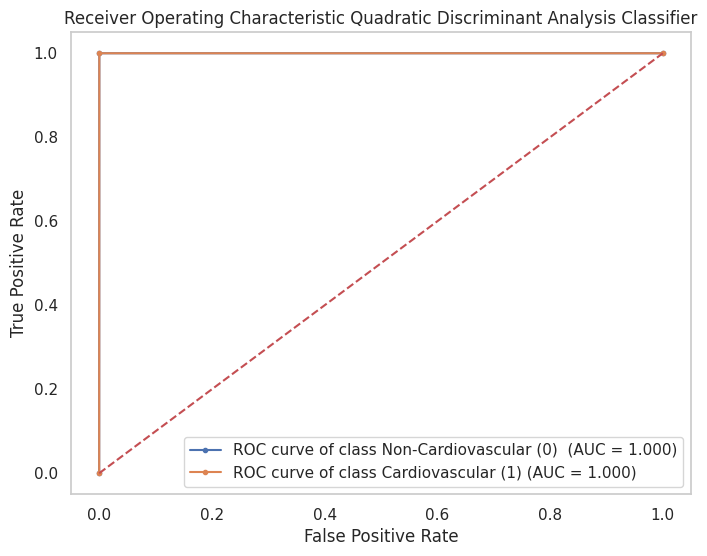

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

qda_roc_auc=roc_auc_score(y_test, y_predict)
qda_fpr, qda_tpr, thresholds = roc_curve(y_test, quadratic_discriminant_analysis.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(qda_fpr, qda_tpr, marker='.', label='ROC curve of class Non-Cardiovascular (0)  (AUC = %0.3f)' % qda_roc_auc)
plt.plot(qda_fpr, qda_tpr, marker='.', label='ROC curve of class Cardiovascular (1) (AUC = %0.3f)' % qda_roc_auc)

plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.title('Receiver Operating Characteristic Quadratic Discriminant Analysis Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('QDA_ROC')
plt.grid()
plt.show()

**Stochastic Gradient Descent Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_classifier= SGDClassifier(loss="log_loss", penalty="l2",max_iter=1000)
print(sgd_classifier)

SGDClassifier(loss='log_loss')


In [ ]:
sgd_classifier_model_history=sgd_classifier.fit(X_train,y_train)

In [ ]:
accu=sgd_classifier.score(X_test,y_test)
print("Accuracy:",(accu*100.0),'%')

Accuracy: 100.0 %


In [ ]:
print(sgd_classifier.coef_)
print(sgd_classifier.intercept_)

[[-2.53356852e-01  4.89086034e-01 -1.20814425e+00 -1.63534568e+00
   8.50633703e-01 -9.00326927e-01 -4.05802522e-02 -3.07064163e-02
  -7.72693549e-03  2.16824154e-01 -1.92521213e+01]]
[6.03826051]


In [ ]:
y_pred=sgd_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

[[8595    0]
 [   0 8905]]




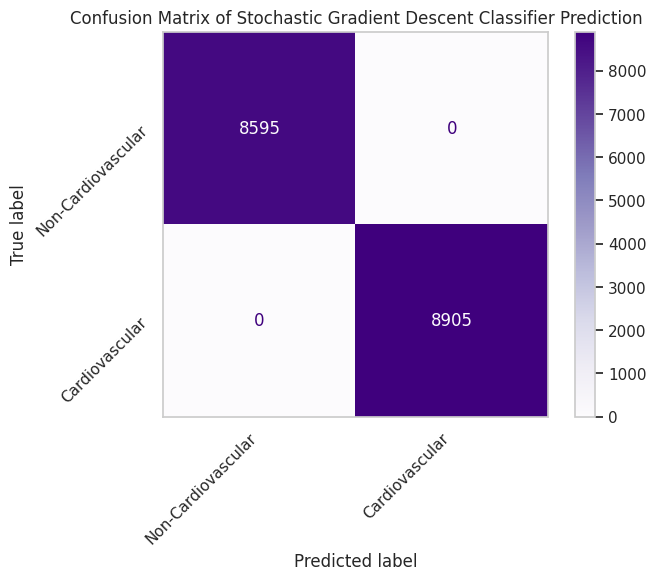

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_predict=sgd_classifier.predict(X_test)

target_names = ['Non-Cardiovascular', 'Cardiovascular']

print(confusion_matrix(y_test,y_predict))
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(7, 5))
cmp = ConfusionMatrixDisplay(cm, display_labels=target_names)
cmp.plot(ax=ax,cmap=plt.cm.Purples)

print('\n')
plt.title('Confusion Matrix of Stochastic Gradient Descent Classifier Prediction')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
plt.grid()
plt.show()

In [ ]:
target_attribute = ['Non-Cardiovascular', 'Cardiovascular']
classificationreport=classification_report(y_test,y_pred,target_names=target_attribute)
arr = np.array(classificationreport)
print(confusion_matrix(y_test,y_predict))
print(arr)

[[8595    0]
 [   0 8905]]
                    precision    recall  f1-score   support

Non-Cardiovascular       1.00      1.00      1.00      8595
    Cardiovascular       1.00      1.00      1.00      8905

          accuracy                           1.00     17500
         macro avg       1.00      1.00      1.00     17500
      weighted avg       1.00      1.00      1.00     17500



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(1.0, 1.0, 1.0, None)

In [ ]:
cm1 = confusion_matrix(y_test,y_pred)
total1=sum(sum(cm1))
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity Score: ', sensitivity1)
print('Specificity Score: ', specificity1)

Sensitivity Score:  1.0
Specificity Score:  1.0


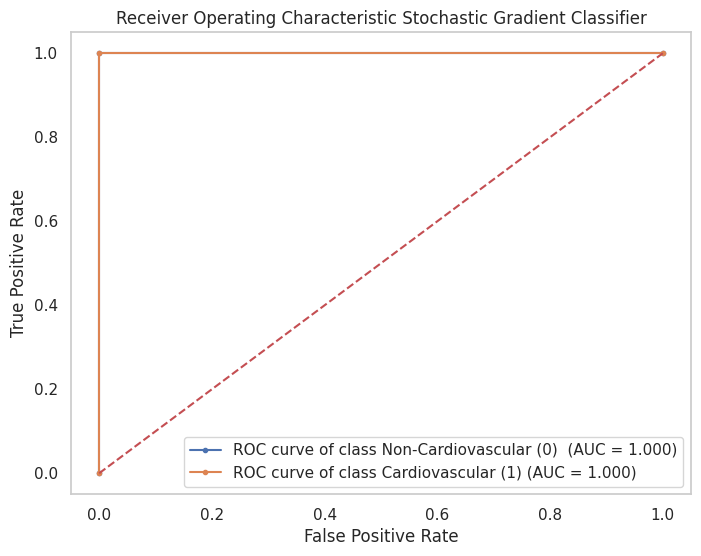

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

sgd_classifier_roc_auc=roc_auc_score(y_test, y_predict)
sgd_classifier_reg_fpr, sgd_classifier_reg_tpr, thresholds = roc_curve(y_test, sgd_classifier.predict(X_test))

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(sgd_classifier_reg_fpr, sgd_classifier_reg_tpr, marker='.', label='ROC curve of class Non-Cardiovascular (0)  (AUC = %0.3f)' % sgd_classifier_roc_auc)
plt.plot(sgd_classifier_reg_fpr, sgd_classifier_reg_tpr, marker='.', label='ROC curve of class Cardiovascular (1) (AUC = %0.3f)' % sgd_classifier_roc_auc)

plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.title('Receiver Operating Characteristic Stochastic Gradient Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('SGC_ROC')
plt.grid()
plt.show()


**Multi-layer Perceptron Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(verbose=1,random_state=42,batch_size=280)
print(mlp)

MLPClassifier(batch_size=280, random_state=42, verbose=1)


In [ ]:
mlp_model_history=mlp.fit(X_train, y_train)

Iteration 1, loss = 0.46287261
Iteration 2, loss = 0.12861503
Iteration 3, loss = 0.03670833
Iteration 4, loss = 0.01486345
Iteration 5, loss = 0.00783790
Iteration 6, loss = 0.00478467
Iteration 7, loss = 0.00319847
Iteration 8, loss = 0.00227441
Iteration 9, loss = 0.00168937
Iteration 10, loss = 0.00129671
Iteration 11, loss = 0.00102169
Iteration 12, loss = 0.00080548
Iteration 13, loss = 0.00056707
Iteration 14, loss = 0.00040289
Iteration 15, loss = 0.00030122
Iteration 16, loss = 0.00023494
Iteration 17, loss = 0.00018944
Iteration 18, loss = 0.00015678
Iteration 19, loss = 0.00013234
Iteration 20, loss = 0.00011401
Iteration 21, loss = 0.00009983
Iteration 22, loss = 0.00008819
Iteration 23, loss = 0.00007920
Iteration 24, loss = 0.00007164
Iteration 25, loss = 0.00006570
Iteration 26, loss = 0.00006057
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [ ]:
accu=mlp.score(X_test,y_test)
print("Accuracy:",(accu*100.0),'%')

Accuracy: 100.0 %


In [ ]:
y_pred=mlp.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

[[8595    0]
 [   0 8905]]




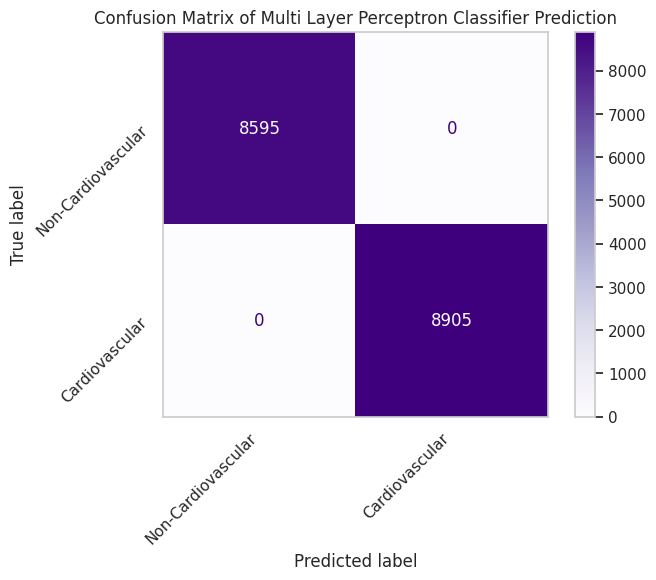

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_predict=mlp.predict(X_test)

target_names = ['Non-Cardiovascular', 'Cardiovascular']

print(confusion_matrix(y_test,y_predict))
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(7, 5))
cmp = ConfusionMatrixDisplay(cm, display_labels=target_names)
cmp.plot(ax=ax,cmap=plt.cm.Purples)

print('\n')
plt.title('Confusion Matrix of Multi Layer Perceptron Classifier Prediction')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
plt.grid()
plt.show()

In [ ]:
target_attribute = ['Non-Cardiovascular', 'Cardiovascular']
classificationreport=classification_report(y_test,y_predict,target_names=target_attribute)
arr = np.array(classificationreport)
print(confusion_matrix(y_test,y_predict))
print(arr)

[[8595    0]
 [   0 8905]]
                    precision    recall  f1-score   support

Non-Cardiovascular       1.00      1.00      1.00      8595
    Cardiovascular       1.00      1.00      1.00      8905

          accuracy                           1.00     17500
         macro avg       1.00      1.00      1.00     17500
      weighted avg       1.00      1.00      1.00     17500



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predict, average='macro')

(1.0, 1.0, 1.0, None)

In [ ]:
cm1 = confusion_matrix(y_test,y_predict)
total1=sum(sum(cm1))
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity Score: ', sensitivity1)
print('Specificity Score: ', specificity1)

Sensitivity Score:  1.0
Specificity Score:  1.0


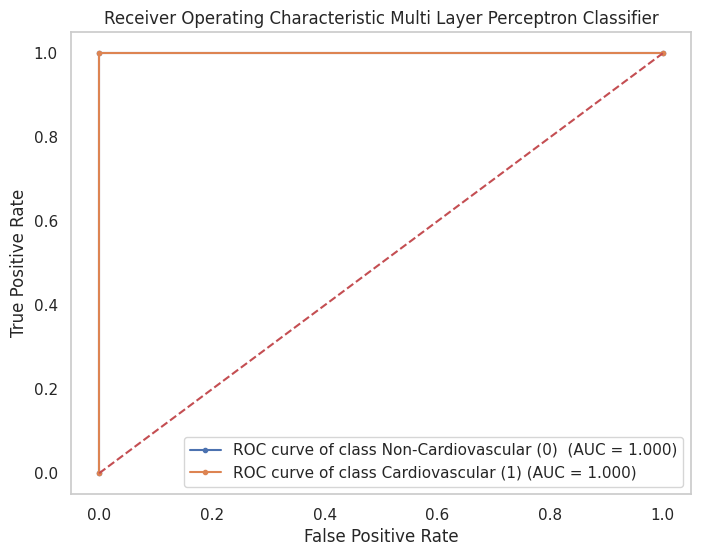

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

mlp_classifier_roc_auc=roc_auc_score(y_test, y_predict)
mlp_classifier_reg_fpr, mlp_classifier_reg_tpr, thresholds = roc_curve(y_test, mlp.predict(X_test))

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(mlp_classifier_reg_fpr, mlp_classifier_reg_tpr, marker='.', label='ROC curve of class Non-Cardiovascular (0)  (AUC = %0.3f)' % mlp_classifier_roc_auc)
plt.plot(mlp_classifier_reg_fpr, mlp_classifier_reg_tpr, marker='.', label='ROC curve of class Cardiovascular (1) (AUC = %0.3f)' % mlp_classifier_roc_auc)

plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.title('Receiver Operating Characteristic Multi Layer Perceptron Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('MLP_ROC')
plt.grid()
plt.show()


**Support Vector Machine Classifier**

In [ ]:
from sklearn import svm
svm_classifier=svm.SVC()
print(svm_classifier)

SVC()


In [ ]:
svm_model_history=svm_classifier.fit(X_train,y_train)

In [ ]:
accu=svm_classifier.score(X_test,y_test)
print("Accuracy:",(accu*100.0),'%')

Accuracy: 100.0 %


In [ ]:
print(svm_classifier.intercept_)

[0.44476072]


In [ ]:
y_pred=svm_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

[[8595    0]
 [   0 8905]]




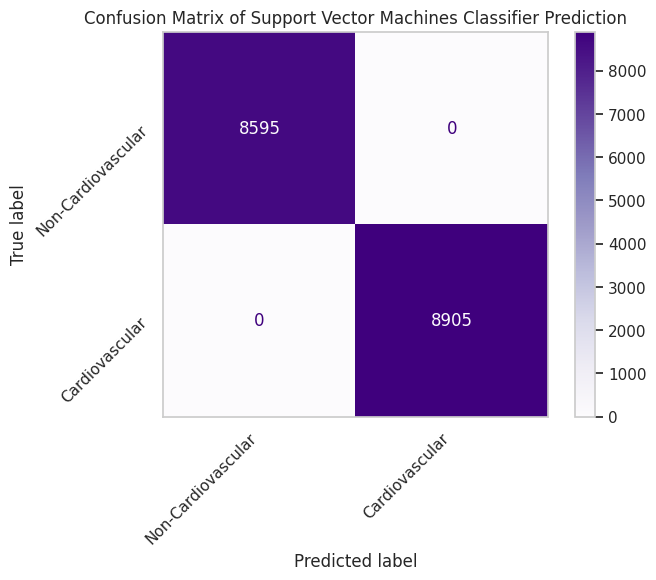

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_predict=svm_classifier.predict(X_test)

target_names = ['Non-Cardiovascular', 'Cardiovascular']

print(confusion_matrix(y_test,y_predict))
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(7, 5))
cmp = ConfusionMatrixDisplay(cm, display_labels=target_names)
cmp.plot(ax=ax,cmap=plt.cm.Purples)

print('\n')
plt.title('Confusion Matrix of Support Vector Machines Classifier Prediction')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
plt.grid()
plt.show()

In [ ]:
target_attribute = ['Non-Cardiovascular', 'Cardiovascular']
classificationreport=classification_report(y_test,y_predict,target_names=target_attribute)
arr = np.array(classificationreport)
print(confusion_matrix(y_test,y_predict))
print(arr)

[[8595    0]
 [   0 8905]]
                    precision    recall  f1-score   support

Non-Cardiovascular       1.00      1.00      1.00      8595
    Cardiovascular       1.00      1.00      1.00      8905

          accuracy                           1.00     17500
         macro avg       1.00      1.00      1.00     17500
      weighted avg       1.00      1.00      1.00     17500



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predict, average='macro')

(1.0, 1.0, 1.0, None)

In [ ]:
cm1 = confusion_matrix(y_test,y_predict)
total1=sum(sum(cm1))
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity Score: ', sensitivity1)
print('Specificity Score: ', specificity1)

Sensitivity Score:  1.0
Specificity Score:  1.0


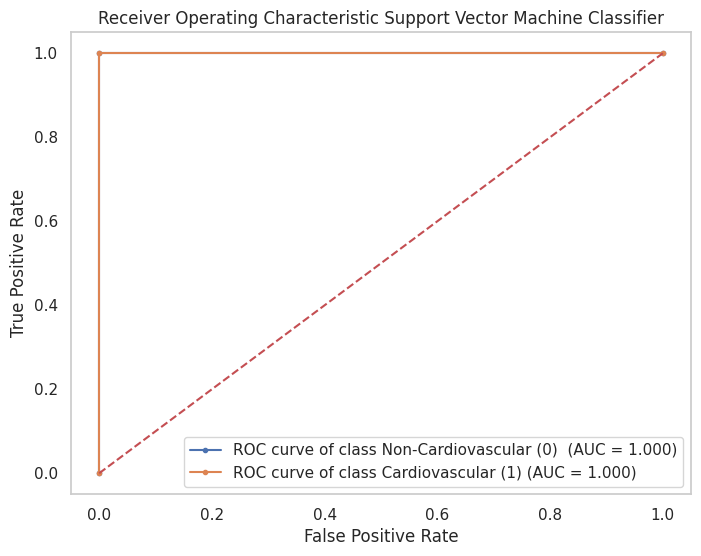

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svm_classifier_roc_auc=roc_auc_score(y_test, y_predict)
svm_classifier_fpr, svm_classifier_tpr, thresholds = roc_curve(y_test, svm_classifier.predict(X_test))

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(svm_classifier_fpr, svm_classifier_tpr, marker='.', label='ROC curve of class Non-Cardiovascular (0)  (AUC = %0.3f)' % svm_classifier_roc_auc)
plt.plot(svm_classifier_fpr, svm_classifier_tpr, marker='.', label='ROC curve of class Cardiovascular (1) (AUC = %0.3f)' % svm_classifier_roc_auc)

plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.title('Receiver Operating Characteristic Support Vector Machine Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('SVMC_ROC')
plt.grid()
plt.show()
